<a href="https://colab.research.google.com/github/rhiats/diab_sev_mimicIII/blob/main/Analysis_of_Patients_with_Type_2_Diabetes_in_ICU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Stratification Analysis of Patients with Type 2 Diabetes in ICU**

Person diagnosed with Diabetes.

Type 2 Diabetic ICD9 Codes (250)/ Admissions - 'diabet...'.

- Admissions- breakdown of insurance type. (one hot encode)
- Admissions - gender (one hot encode)
- Prescriptions  - Top 5 drugs (one hot encode)
- Prescriptions - Distribution number of drugs per patient

http://www.icd9data.com/2014/Volume1/240-279/249-259/250/250.00.htm

https://physionet.org/content/mimic3-carevue/1.4/

https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_admissions=pd.read_csv('/content/drive/MyDrive/mimic-iii-clinical-database-carevue-subset-1.4/ADMISSIONS.csv.gz', compression='gzip')
df_patients=pd.read_csv('/content/drive/MyDrive/mimic-iii-clinical-database-carevue-subset-1.4/PATIENTS.csv.gz', compression='gzip')
df_presciptions=pd.read_csv('/content/drive/MyDrive/mimic-iii-clinical-database-carevue-subset-1.4/PRESCRIPTIONS.csv.gz', compression='gzip')

<ipython-input-2-8f50def5d0b2>:3: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df_presciptions=pd.read_csv('/content/drive/MyDrive/mimic-iii-clinical-database-carevue-subset-1.4/PRESCRIPTIONS.csv.gz', compression='gzip')


**Identify Diabetic Patients**

In [3]:
def diabetetesFind(x):
  """
    Find patients diagnosed with Diabetes.
    @p: pandas series 'diagnosis'
    @r: dataframe with diabetic patients
  """
  x=str(x)
  x=x.lower()
  return x

df_admissions['diagnosis_lower']=df_admissions['diagnosis'].apply(diabetetesFind)
df_diab=df_admissions[df_admissions['diagnosis_lower'].str.contains(pat = 'diabet')]

num_patients=df_diab['subject_id'].nunique()
'There are {} patients in the ICU diagnosed diabetes.'.format(num_patients)

'There are 131 patients in the ICU diagnosed diabetes.'

**Distribution of Patients Gender**

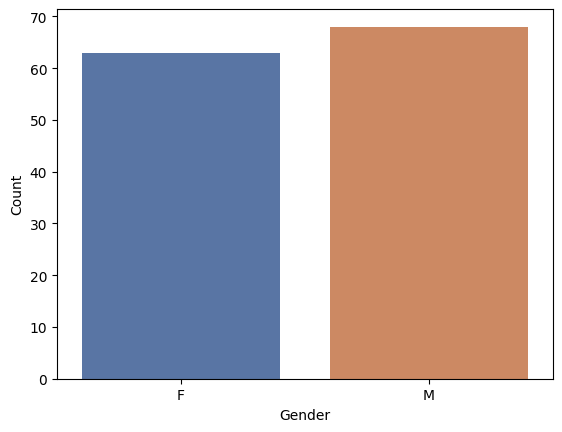

In [4]:
sub_id_diab=list(set(df_diab['subject_id'].to_list()))

df_gender=df_patients[df_patients['subject_id'].isin(sub_id_diab)][['subject_id','gender']]

fem_mal_df=df_gender.groupby(['gender']).count().reset_index()

fem_mal_df.rename(columns={"subject_id": "Count","gender": "Gender"}, inplace=True)

sns.barplot(data=fem_mal_df, x='Gender', y="Count", palette="deep")

plt.savefig("/content/drive/MyDrive/output/gender.png")

**Distribution of Insurance Types for Diabetic Patients**

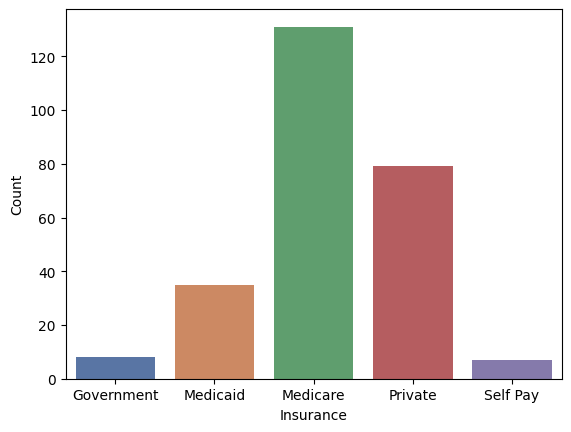

In [5]:
df_insur_diab=df_admissions[df_admissions['subject_id'].isin(sub_id_diab)][['subject_id','insurance']]

insur_df_cnt=df_insur_diab.groupby(['insurance']).count().reset_index()

insur_df_cnt.rename(columns={"subject_id": "Count","insurance": "Insurance"}, inplace=True)

sns.barplot(data=insur_df_cnt, x='Insurance', y="Count", palette="deep")

plt.savefig("/content/drive/MyDrive/output/insurance.png")

**Top 3 Drugs used by Diabetic Patients in the ICU**

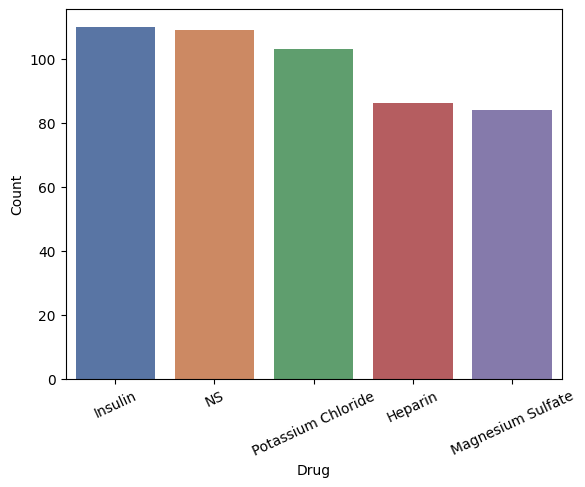

In [11]:
df_drug_diab=df_presciptions[df_presciptions['subject_id'].isin(sub_id_diab)][['subject_id','drug']]
df_drug=df_drug_diab.groupby(['drug']).nunique().reset_index()
df_drug.rename(columns={"subject_id": "Count","drug": "Drug"}, inplace=True)
df_top_5_drugs=df_drug.nlargest(5, 'Count')

sns.barplot(data=df_top_5_drugs, x='Drug', y="Count", palette="deep")
plt.xticks(rotation = 25)

plt.savefig("/content/drive/MyDrive/output/top5Drugs.png")

**Distribution of Medications per Person**

    subject_id  Number of Medications
78       19213                    182
15        3868                    150
89       21431                    147
81       20356                    131
68       17423                    130


<ipython-input-7-100319b91ee0>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df_drug_per_patient, x="Number of Medications",palette="Deep")


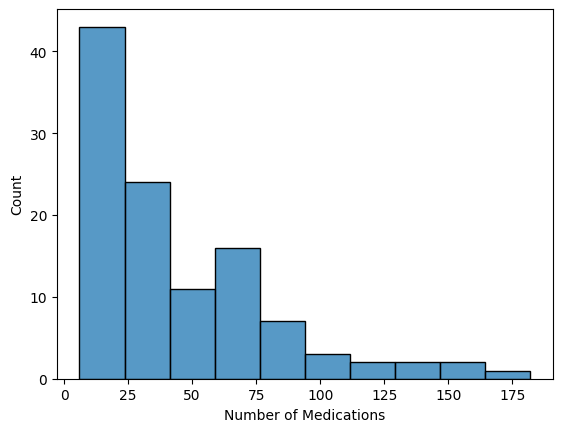

In [7]:
df_drug_per_patient=df_drug_diab.groupby(['subject_id']).nunique().reset_index()
df_drug_per_patient.rename(columns={"drug": "Number of Medications"}, inplace=True)
print(df_drug_per_patient.nlargest(5, 'Number of Medications'))

sns.histplot(data=df_drug_per_patient, x="Number of Medications",palette="Deep")

plt.savefig("/content/drive/MyDrive/output/drugs_per_patient.png")

In [8]:
drugs_19213_ser=df_presciptions[df_presciptions['subject_id']==19213]['drug']
drugs_19213_ser_lst=list(set(drugs_19213_ser.to_list()))
"Patient 19213 is on {} unique medications while in the ICU".format(len(drugs_19213_ser_lst))

'Patient 19213 is on 182 unique medications while in the ICU'

**Feature Matrix for PCA**

In [9]:
#join df_gender, df_insur_diab, df_drug_diab,  df_drug_per_patient
#Replace df_drug_diab not top 3 with 'other'
#one-hot encode (drug 1, 2, 3, other)

one_hot_encoded_data = pd.get_dummies(data, columns = ['Remarks', 'Gender'])
print(one_hot_encoded_data)

NameError: ignored

**PCA**

**Scree Plot**

Select Feature 1

**Interpret the Weights of the First Component**

**Project each patient on the First Component to Calculate their Severity Score**

In the future, patients can be projected on the component to determine their risk for developing Diabetes based on pre-existing conditions. Also, patients who are considered diabetic may be identified from a drug basket.